<a href="https://colab.research.google.com/github/Scrummyyy/python_projects/blob/main/Customer_orders_vizualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/sample_data/merch_sales.csv')

In [ ]:
df.head(5)

,Order ID,Order Date,Product ID,Product Category,Buyer Gender,Buyer Age,Order Location,International Shipping,Sales Price,Shipping Charges,Sales per Unit,Quantity,Total Sales,Rating,Review
0,189440,2024-07-21,BF1543,Clothing,Male,30,New Jersey,No,100,0,100,1,100,4,The delivery team handled the product with care.
1,187385,2024-07-20,BF1543,Clothing,Male,32,Las Vegas,No,100,0,100,1,100,3,Had slight delays but the product was in good ...
2,181844,2024-07-21,BF1544,Other,Female,26,Cardiff,Yes,9,40,49,1,49,2,Waste of Money.
3,197934,2024-08-19,BF1544,Other,Male,28,Pittsburgh,No,9,0,9,2,18,3,Had slight delays but the product was in good ...
4,122470,2024-01-06,BF1545,Other,Female,19,Miami,No,10,0,10,3,30,5,Lack of delivery delays is greatly appreciated.


1. Загальна інформація

In [ ]:
df.shape

(7394, 15)

In [ ]:
df.describe()

,Order ID,Buyer Age,Sales Price,Shipping Charges,Sales per Unit,Quantity,Total Sales,Rating
count,7394.000000,7394.000000,7394.000000,7394.000000,7394.000000,7394.000000,7394.000000,7394.000000
mean,159735.134028,26.455504,55.165404,14.633487,69.798891,1.668109,115.832026,3.499053
std,23040.247194,5.208202,39.575614,24.815719,46.702326,1.081398,118.067960,1.389731
min,120005.000000,18.000000,9.000000,0.000000,9.000000,1.000000,9.000000,1.000000
25%,139895.750000,22.000000,15.000000,0.000000,20.000000,1.000000,40.000000,3.000000
50%,159577.500000,26.000000,65.000000,0.000000,65.000000,1.000000,90.000000,4.000000
75%,179869.750000,31.000000,97.000000,40.000000,100.000000,2.000000,137.000000,5.000000
max,199994.000000,35.000000,130.000000,100.000000,230.000000,5.000000,1000.000000,5.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7394 entries, 0 to 7393
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Order ID                7394 non-null   int64 
 1   Order Date              7394 non-null   object
 2   Product ID              7394 non-null   object
 3   Product Category        7394 non-null   object
 4   Buyer Gender            7394 non-null   object
 5   Buyer Age               7394 non-null   int64 
 6   Order Location          7394 non-null   object
 7   International Shipping  7394 non-null   object
 8   Sales Price             7394 non-null   int64 
 9   Shipping Charges        7394 non-null   int64 
 10  Sales per Unit          7394 non-null   int64 
 11  Quantity                7394 non-null   int64 
 12  Total Sales             7394 non-null   int64 
 13  Rating                  7394 non-null   int64 
 14  Review                  7394 non-null   object
dtypes: i

2. Обробка пропущених значень

In [ ]:
df.isnull().sum()

,0
Order ID,0
Order Date,0
Product ID,0
Product Category,0
Buyer Gender,0
Buyer Age,0
Order Location,0
International Shipping,0
Sales Price,0
Shipping Charges,0


3. Аналіз категорій товарів

In [ ]:
#Product category
df['Product Category'].drop_duplicates()

,Product Category
0,Clothing
2,Other
6,Ornaments


In [ ]:
df[['Product Category', 'Order ID']].groupby('Product Category').count().sort_values(by = 'Product Category', ascending = True)

,Order ID
Product Category,
Clothing,3704
Ornaments,2256
Other,1434


/tmp/ipython-input-36-2019479752.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Product Category', data = df, palette="Set2")


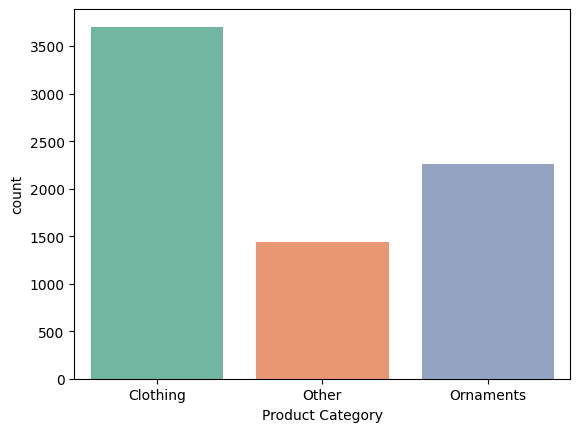

In [ ]:
sns.countplot(x = 'Product Category', data = df, palette="Set2")

4. Аналіз покупців

In [ ]:
#Average age
df[['Buyer Gender', 'Buyer Age']].groupby('Buyer Gender').mean('Buyer Age')

,Buyer Age
Buyer Gender,
Female,26.297824
Male,26.522552


<Axes: xlabel='Count', ylabel='Buyer Age'>

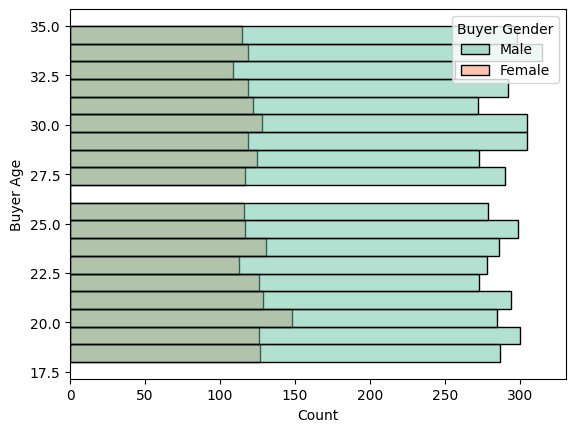

In [ ]:
#Histogram by age and gender
sns.histplot(y ='Buyer Age', hue = 'Buyer Gender', data = df, palette = 'Set2', cbar=True)

In [ ]:
#Top 3 location
df[['Order Location', 'Order ID']].groupby('Order Location').count().sort_values(by = 'Order ID', ascending = False).head(3)

,Order ID
Order Location,
New Jersey,434
Portland,420
San Francisco,414


5. Аналіз продажів

In [ ]:
df['Total Sales'].sum()

np.int64(856462)

In [ ]:
df[['International Shipping', 'Shipping Charges']].groupby('International Shipping').mean()

,Shipping Charges
International Shipping,
No,0.000000
Yes,47.982262


<Axes: xlabel='Total Sales', ylabel='International Shipping'>

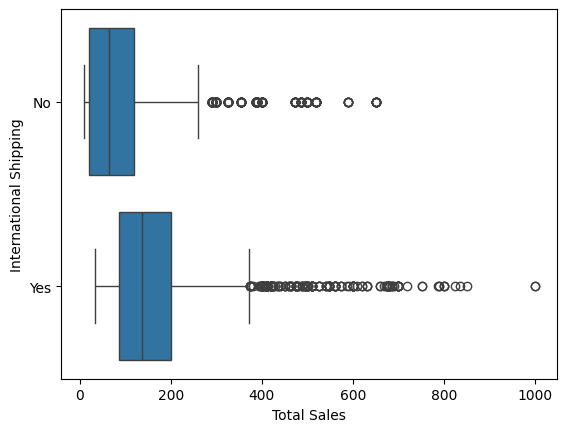

In [ ]:
sns.boxplot(y = 'International Shipping', x = 'Total Sales', data = df)

<Axes: xlabel='Product Category', ylabel='Rating'>

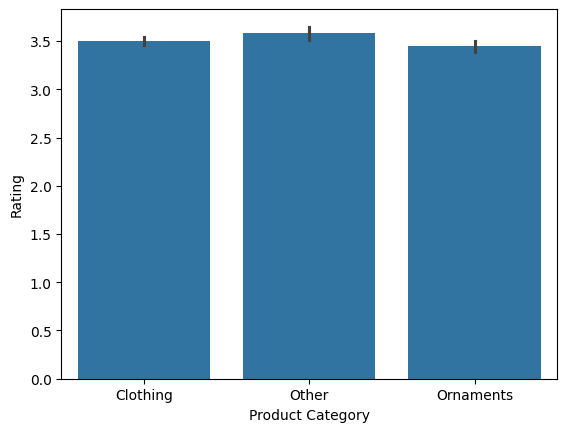

In [ ]:
sns.barplot(
    y = 'Rating',
    x = 'Product Category',
    data = df)

In [5]:
#Change object into datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7394 entries, 0 to 7393
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Order ID                7394 non-null   int64         
 1   Order Date              7394 non-null   datetime64[ns]
 2   Product ID              7394 non-null   object        
 3   Product Category        7394 non-null   object        
 4   Buyer Gender            7394 non-null   object        
 5   Buyer Age               7394 non-null   int64         
 6   Order Location          7394 non-null   object        
 7   International Shipping  7394 non-null   object        
 8   Sales Price             7394 non-null   int64         
 9   Shipping Charges        7394 non-null   int64         
 10  Sales per Unit          7394 non-null   int64         
 11  Quantity                7394 non-null   int64         
 12  Total Sales             7394 non-null   int64   

In [13]:
#Preparing data
df['year'] = df['Order Date'].dt.strftime('%Y').astype(int)
df.sort_values(by = 'year', ascending = True)
df['month_year_str'] = df['Order Date'].dt.strftime('%b %Y')
df['month_year_str'] = pd.to_datetime(df['month_year_str'], format='%b %Y')



In [16]:
count_orders = df.groupby('month_year_str').size()
count_orders

,0
month_year_str,
2023-11-01,527
2023-12-01,625
2024-01-01,668
2024-02-01,606
2024-03-01,657
2024-04-01,620
2024-05-01,660
2024-06-01,552
2024-07-01,644


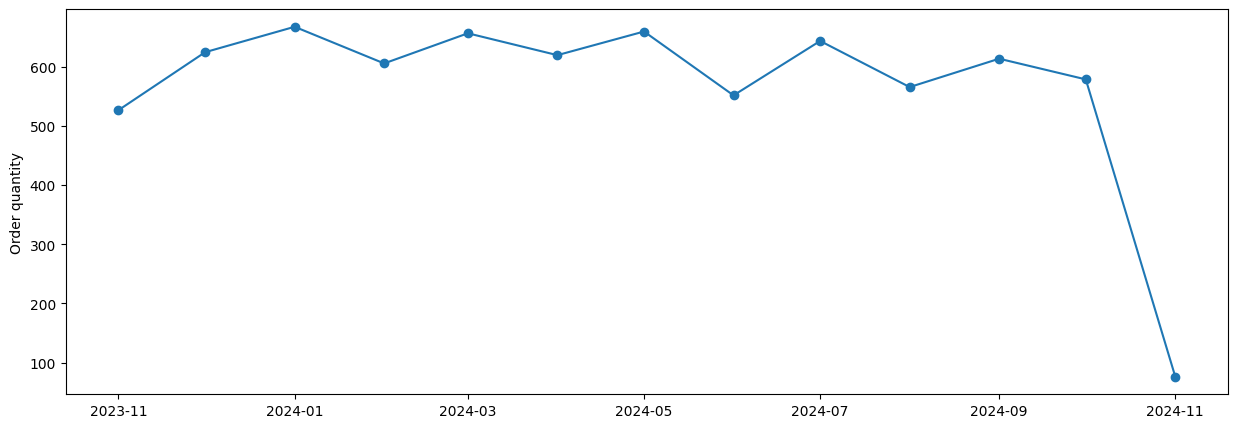

In [15]:
plt.figure(figsize = (15, 5))
plt.plot(count_orders.index, count_orders.values, marker = 'o', )
plt.ylabel('Order quantity')
plt.show()

In [20]:
quantity_price = df[['Sales Price', 'Quantity']].groupby('Sales Price').sum()

Text(0.5, 0, 'Total_price')

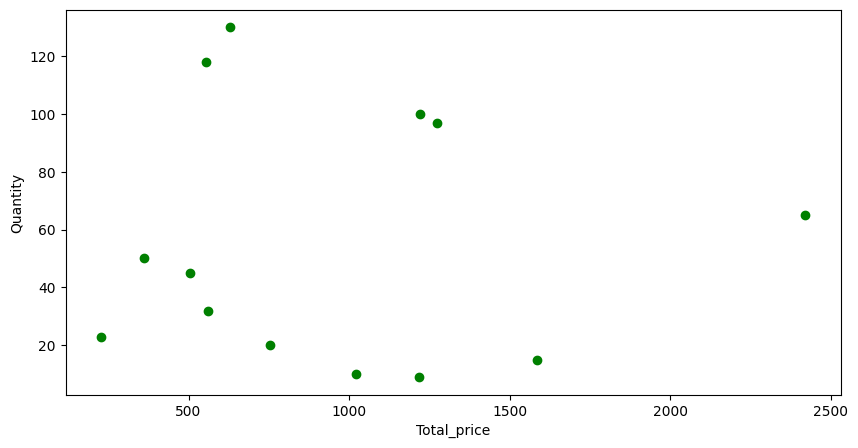

In [27]:
plt.figure(figsize = (10, 5))
plt.scatter(quantity_price.values,
            quantity_price.index,
            color = 'green')
plt.ylabel('Quantity')
plt.xlabel('Total_price')

In [46]:
ratings_count  = df.groupby('Rating')['Order ID'].count()
ratings_count

,Order ID
Rating,
1,1087
2,760
3,1117
4,2236
5,2194


<BarContainer object of 5 artists>

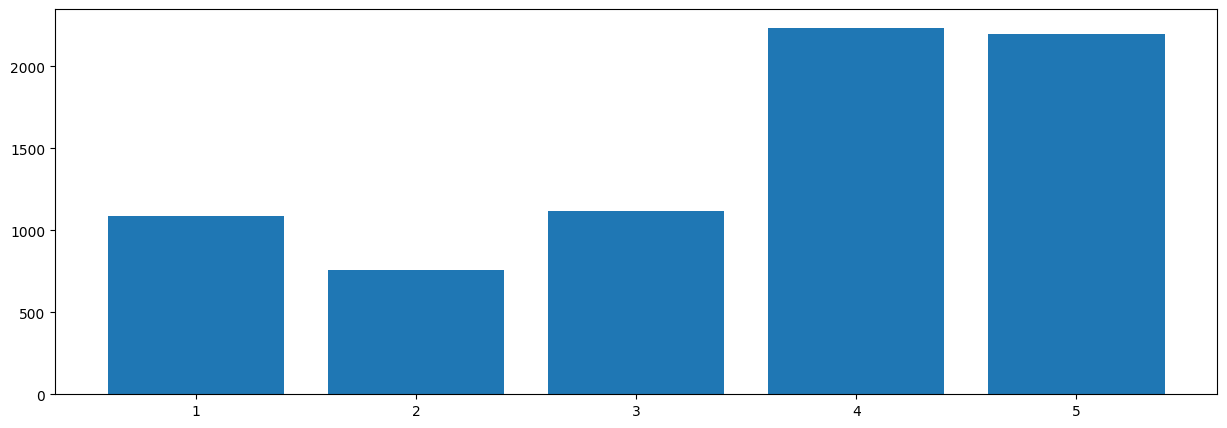

In [45]:
plt.figure(figsize = (15, 5))
plt.bar(ratings_count.index, ratings_count.values)